original dataset at https://www.kaggle.com/datasets/zeesolver/data-eng-salary-2024

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/DatasetProjects/DatasetSalary2024.csv') #in drive file rinominato per togliere gli spazi sul nome
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


check missing values

In [5]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [11]:
for i in data.columns:
  #i=str(i)
  print("Total categories in the feature " +i +" :\n", data[i].value_counts(), "\n")

Total categories in the feature work_year :
 work_year
2023    8519
2024    6067
2022    1655
2021     218
2020      75
Name: count, dtype: int64 

Total categories in the feature experience_level :
 experience_level
SE    10670
MI     4038
EN     1325
EX      501
Name: count, dtype: int64 

Total categories in the feature employment_type :
 employment_type
FT    16454
PT       38
CT       28
FL       14
Name: count, dtype: int64 

Total categories in the feature job_title :
 job_title
Data Engineer                    3464
Data Scientist                   3314
Data Analyst                     2440
Machine Learning Engineer        1705
Research Scientist                531
                                 ... 
Quantitative Research Analyst       1
AWS Data Architect                  1
Analytics Engineering Manager       1
Marketing Data Scientist            1
Applied Research Scientist          1
Name: count, Length: 155, dtype: int64 

Total categories in the feature salary :
 salary
1

In [12]:
#elimino features non rilevanti o che esprimono quasi tutte lo stesso valore come employment type
data=data.drop(['company_location','salary_currency','salary','employment_type','employee_residence'], axis = 1)
data.head()

,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_size
0,2024,SE,AI Engineer,202730,0,M
1,2024,SE,AI Engineer,92118,0,M
2,2024,SE,Data Engineer,130500,0,M
3,2024,SE,Data Engineer,96000,0,M
4,2024,SE,Machine Learning Engineer,190000,0,M


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         16534 non-null  int64 
 1   experience_level  16534 non-null  object
 2   job_title         16534 non-null  object
 3   salary_in_usd     16534 non-null  int64 
 4   remote_ratio      16534 non-null  int64 
 5   company_size      16534 non-null  object
dtypes: int64(3), object(3)
memory usage: 775.2+ KB


In [18]:
data.describe()

,work_year,salary_in_usd,remote_ratio
count,16534.000000,16534.000000,16534.000000
mean,2023.226866,149686.777973,32.003750
std,0.713558,68505.293156,46.245158
min,2020.000000,15000.000000,0.000000
25%,2023.000000,101125.000000,0.000000
50%,2023.000000,141300.000000,0.000000
75%,2024.000000,185900.000000,100.000000
max,2024.000000,800000.000000,100.000000


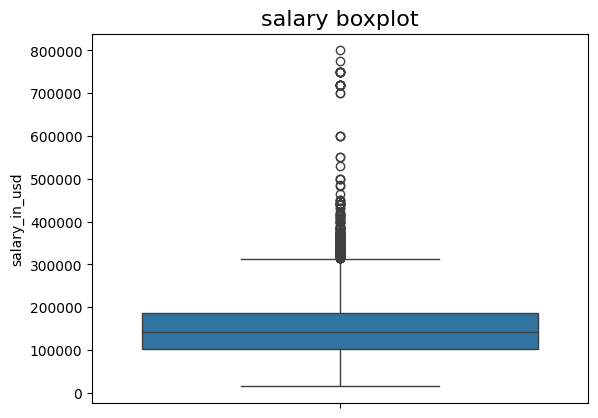

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
box_plot  = plt.subplots()
box_plot = sns.boxplot(data['salary_in_usd'])
plt.title('salary boxplot', size=16)
plt.show()

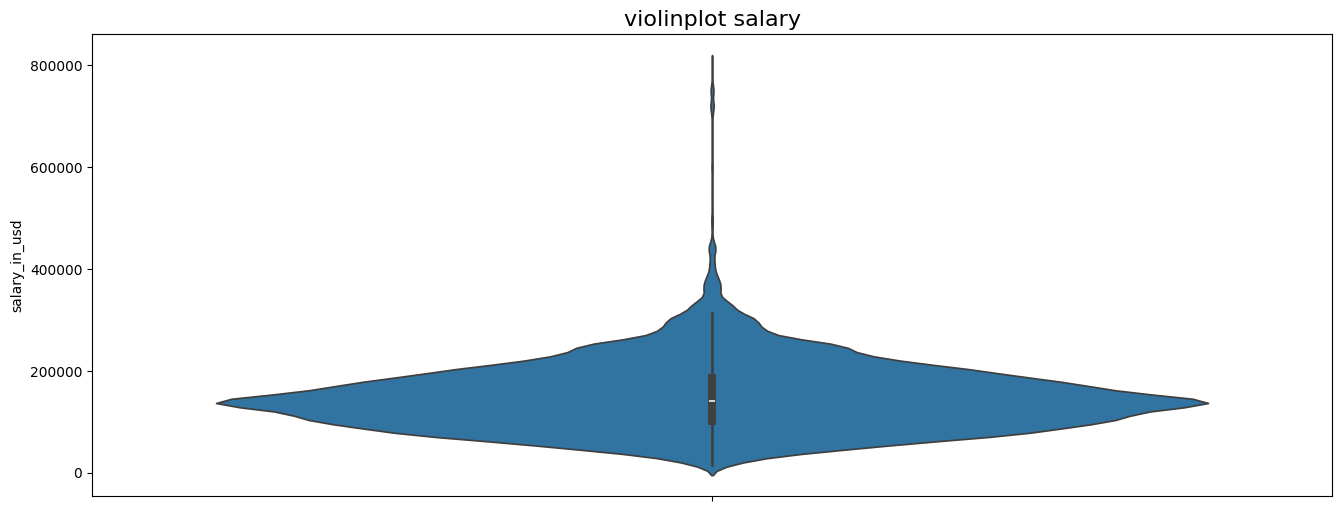

In [24]:
plt.figure(figsize=(16, 6))
sns.violinplot(data['salary_in_usd'])
plt.title('violinplot salary', size=16)
plt.show()

<Figure size 1600x600 with 0 Axes>

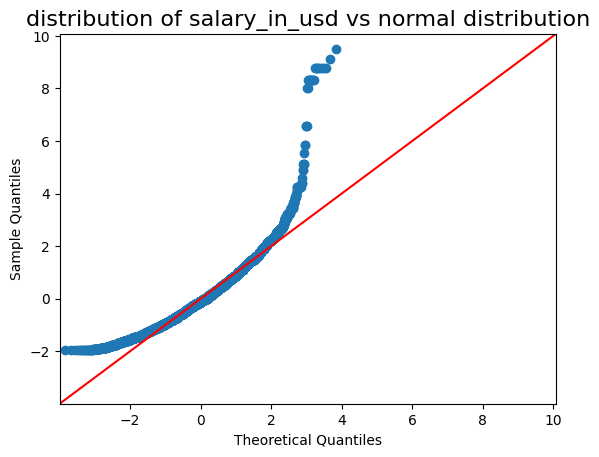

In [23]:
import statsmodels.api as sm
plt.figure(figsize=(16, 6))
sm.qqplot(data['salary_in_usd'], line='45', fit=True)
plt.title('distribution of salary_in_usd vs normal distribution', size=16)
plt.show()

<ipython-input-25-f1a307b341e8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['salary_in_usd'], bins = 20, kde = True)


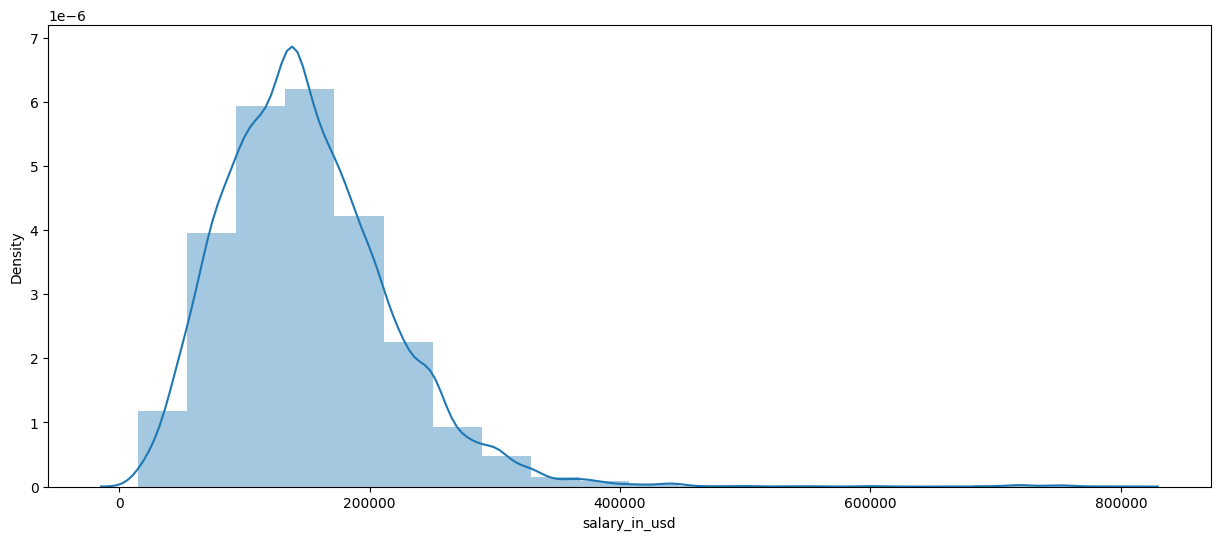

In [25]:
plt.figure(figsize=(15,6))
sns.distplot(data['salary_in_usd'], bins = 20, kde = True)
plt.show()

In [19]:
#download on your local machine
#further analysis with tableau
data.to_csv('CleanedDataDeveloperSalary.csv') #name of the new file after cleaning it
from google.colab import files
files.download("CleanedDataDeveloperSalary.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>